In [1]:
import glob
import polars
import plotly.express as px
from pathlib import Path
import numpy as np
import plotly.io as pio
import matplotlib.pyplot as plt

In [2]:
DIR = "C:\\Users\\aurin\\Desktop\\magisterka\\exp2\\mapping"

In [5]:
names = []
reads_mapped = []
reads_mapped_paired = []
reads_unmapped = []
reads_paired = []
bases_mapped = []
mismatches = []
error_rate = []
average_length = []
number_of_sequences = []

for file in glob.glob(f"{DIR}\\*"):
    name = Path(file).stem
    names.append(name)
    print(name)
    df = polars.read_csv(file, has_header = True, separator = "\t", skip_rows = 7, 
                           truncate_ragged_lines=True, n_rows = 40, 
                           new_columns = ["SN", "Q", "V", "comment"]
                          )
    n_sequences = df.filter(df["Q"] == "sequences:").select("V").item()
    number_of_sequences.append(n_sequences)
    r_mapped = df.filter(df["Q"] == "reads mapped:").select("V").item()
    reads_mapped.append(r_mapped)
    r_mapped_paired = df.filter(df["Q"] == "reads mapped and paired:").select("V").item()
    reads_mapped_paired.append(r_mapped_paired)
    r_unmapped = df.filter(df["Q"] == "reads unmapped:").select("V").item()
    reads_unmapped.append(r_unmapped)
    r_paired = df.filter(df["Q"] == "reads paired:").select("V").item()
    reads_paired.append(r_paired)
    b_mapped = df.filter(df["Q"] == "bases mapped (cigar):").select("V").item()
    bases_mapped.append(b_mapped)
    mm = df.filter(df["Q"] == "mismatches:").select("V").item()
    mismatches.append(mm)
    er = df.filter(df["Q"] == "error rate:").select("V").item()
    error_rate.append(er)
    al = df.filter(df["Q"] == "average length:").select("V").item()
    average_length.append(al)

BG18_stats
BG18_stats_result_s
BG32_stats_result_s
BG9_stats_result_s
brm1_31_stats_result_s
brm1_37_stats_result_s
brm1_38_stats_result_s
brm5_41_stats_result_s
brm5_43_stats_result_s
brm5_44_stats_result_s
Col19_stats_result_s
Col20_stats_result_s
Col4_stats_result_s
CRT2_12_stats_result_s
CRT2_13_stats_result_s
CRT2_14_stats_result_s
KR_21_stats_result_s
KR_5_stats_result_s
KR_8_stats_result_s
LD_22_stats_result_s
LD_30_stats_result_s
LD_7_stats_result_s


In [6]:
data = polars.DataFrame({"samples": names,
                        "reads_mapped": reads_mapped,
                        "reads_mapped_paired": reads_mapped_paired,
                        "reads_unmapped": reads_unmapped,
                        "reads_paired": reads_paired,
                        "bases_mapped": bases_mapped,
                        "mismatches": mismatches,
                        "error_rate": error_rate,
                        "average_length": average_length
                        })

df = data.to_pandas()

In [14]:
error_rate

[0.00564903,
 0.005721972,
 0.005815556,
 0.006051748,
 0.005567943,
 0.005665943,
 0.005917796,
 0.006061931]

In [7]:
columns_to_plot = ["reads_mapped", "reads_mapped_paired", "reads_unmapped",
                   "reads_paired", "bases_mapped", "mismatches", "error_rate", "average_length"]

for col in columns_to_plot:
    fig = px.bar(df, x="samples", y=col, title=f'{col}', hover_name="samples")
    fig.update_layout(
        width=600,  # Set width of the plot
        height=300,  # Set height of the plot
        margin=dict(l=20, r=20, t=30, b=20),  # Reduce margins
        title=dict(x=0.5, font=dict(size=14)),  # Center title and reduce its font size
        xaxis=dict(tickangle=45, tickfont=dict(size=10)),  # Rotate x-axis labels for readability, reduce font size
        yaxis=dict(title=None, tickfont=dict(size=10)),  # Remove y-axis title, reduce font size
        legend=dict(font=dict(size=10), orientation='h', yanchor="bottom", y=1.02, xanchor="right", x=1)  # Adjust legend position and font size
    )

    fig.show()

In [10]:
DIR = "C:\\Users\\aurin\\Desktop\\magisterka\\mapping\\v2"
file = f'{DIR}\\unique_long.txt'
long_values = []
long_samples = []

with open(file) as f:
    for line in f:
        lista = line.split(' ')
        long_values.append(int(lista[0]))
        long_samples.append(lista[1].split('\n')[0])


DIR = "C:\\Users\\aurin\\Desktop\\magisterka\\mapping\\v2"
file = f'{DIR}\\unique_short.txt'
short_values = []
short_samples = []

with open(file) as f:
    for line in f:
        lista = line.split(' ')
        short_values.append(int(lista[0]))
        short_samples.append(lista[1].split('\n')[0])



DIR = "C:\\Users\\aurin\\Desktop\\magisterka\\exp2"
file = f'{DIR}\\unique_exp1_1.txt'
exp11_values = []
exp11_samples = []

with open(file) as f:
    for line in f:
        lista = line.split(' ')
        exp11_values.append(int(lista[0]))
        exp11_samples.append(lista[1].split('\n')[0])

ValueError: invalid literal for int() with base 10: '\n'

C:\Users\aurin\AppData\Local\Temp\ipykernel_12568\297558840.py:5: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



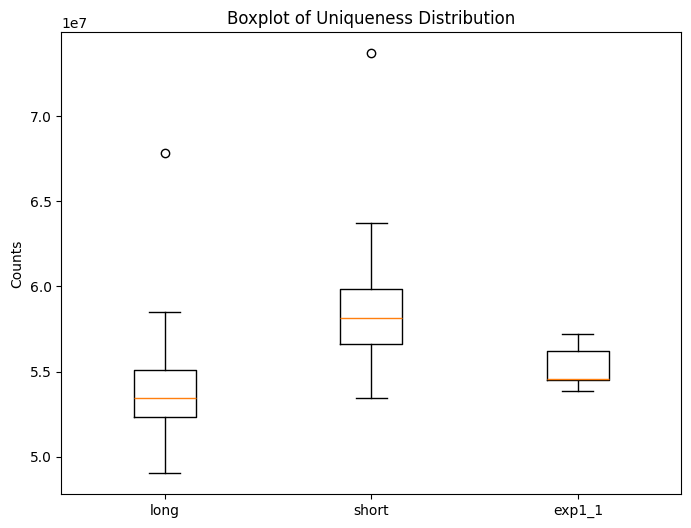

In [11]:
# Create a boxplot for both distributions
plt.figure(figsize=(8, 6))

# Create the boxplot, passing the two lists as a list of lists
plt.boxplot([long_values, short_values, exp11_values], labels=["long", "short", "exp1_1"])

# Add title and labels
plt.title("Boxplot of Uniqueness Distribution")
plt.ylabel("Counts")

# Show the plot
plt.show()